In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('creditcard.csv')

In [ ]:
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
data['Class'].value_counts(normalize=True)

,proportion
Class,
0.0,0.996311
1.0,0.003689


In [ ]:
data['Class'].value_counts(normalize=False)

,count
Class,
0.0,23769
1.0,88


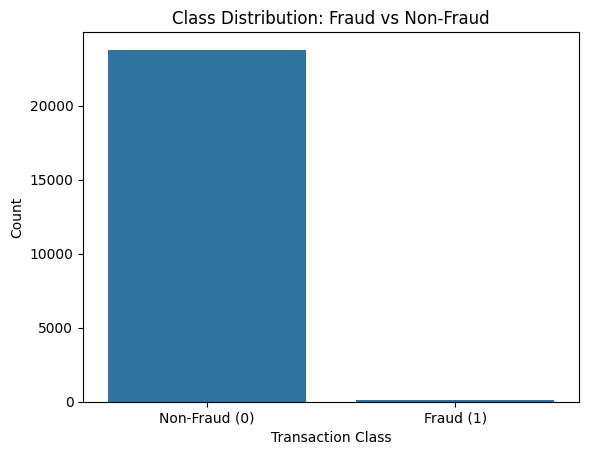

In [ ]:
sns.countplot(x='Class', data=data)
plt.title('Class Distribution: Fraud vs Non-Fraud')
plt.xticks([0, 1], ['Non-Fraud (0)', 'Fraud (1)'])
plt.xlabel('Transaction Class')
plt.ylabel('Count')
plt.show()


In [ ]:
data['Amount'].describe()

,Amount
count,23857.000000
mean,73.976583
std,212.761278
min,0.000000
25%,5.990000
50%,18.040000
75%,66.000000
max,7879.420000


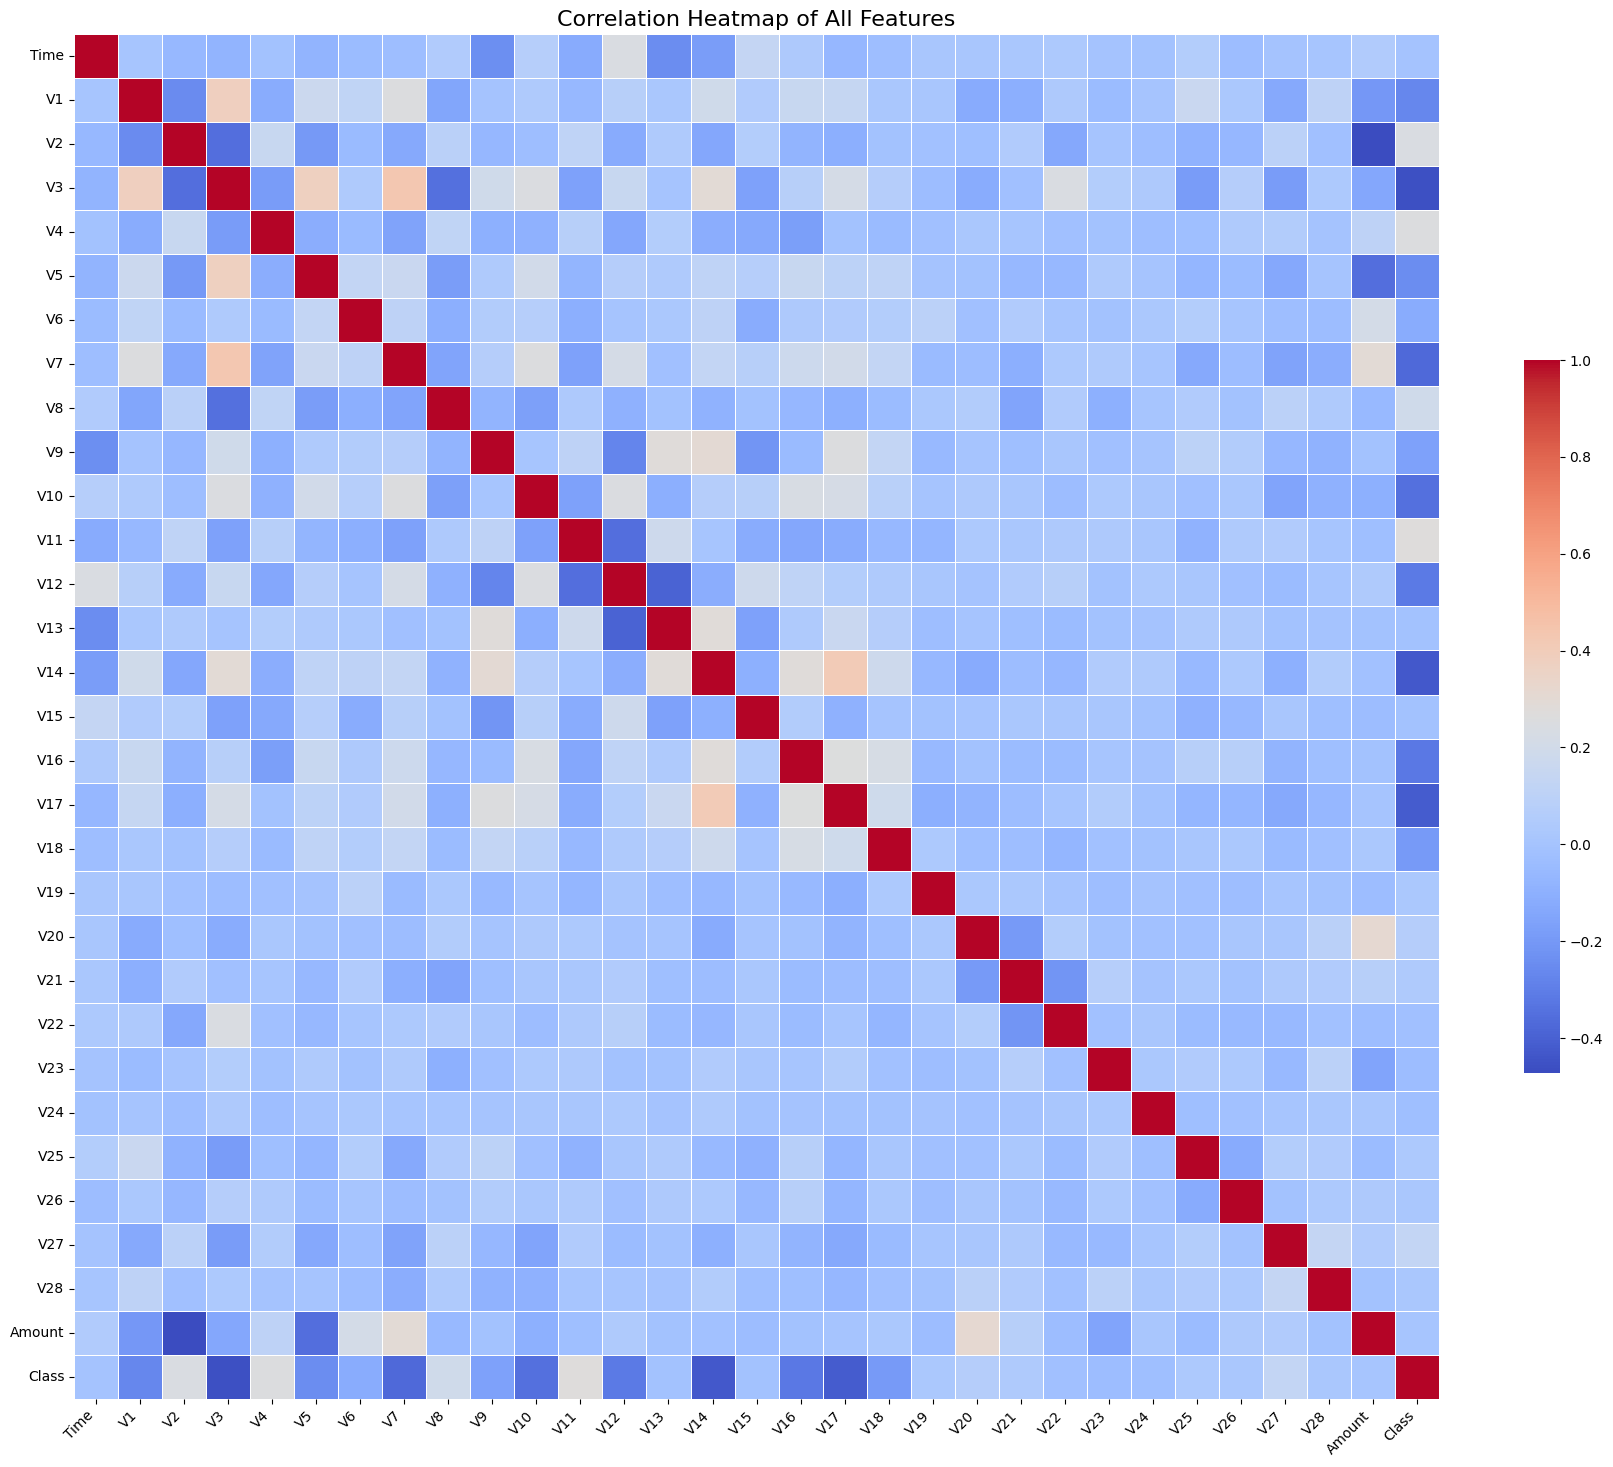

In [ ]:
plt.figure(figsize=(18, 15))
sns.heatmap(data.corr(),
            cmap='coolwarm',
            annot=False,  #
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 0.5})
plt.title('Correlation Heatmap of All Features', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

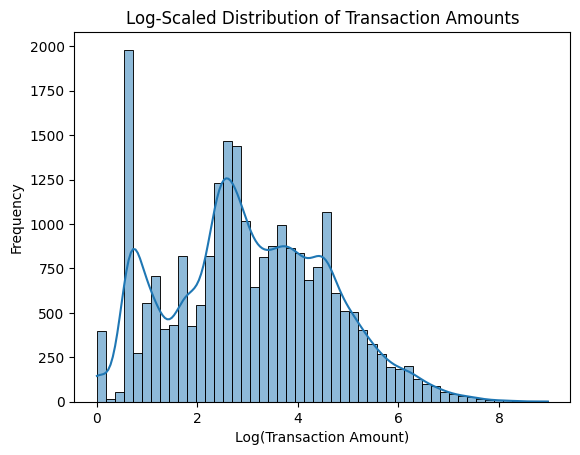

In [ ]:
data['log_amount'] = np.log1p(data['Amount'])

sns.histplot(data['log_amount'], bins=50, kde=True)
plt.title('Log-Scaled Distribution of Transaction Amounts')
plt.xlabel('Log(Transaction Amount)')
plt.ylabel('Frequency')
plt.show()

<ipython-input-10-5cc0f81f5b2b>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['Class'] == 0]['V24'], label='Non-Fraud', shade=True)
<ipython-input-10-5cc0f81f5b2b>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['Class'] == 1]['V24'], label='Fraud', shade=True, color='red')


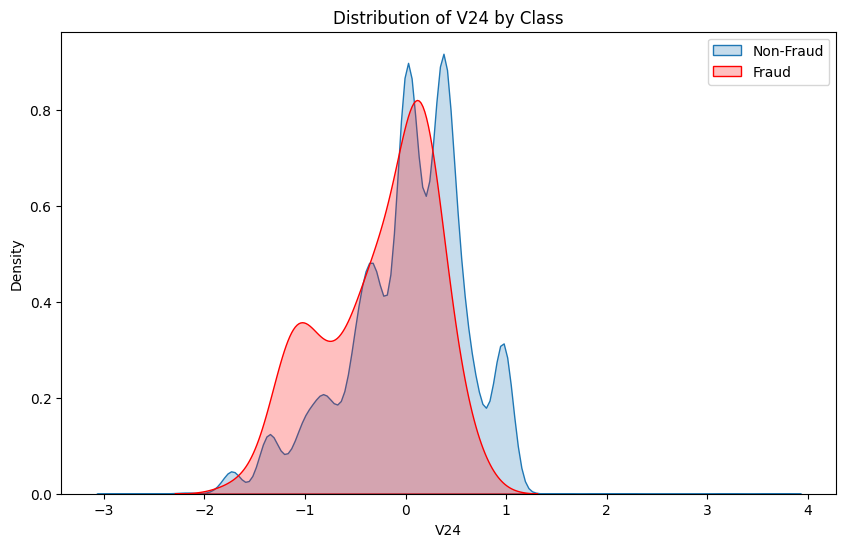

In [ ]:
plt.figure(figsize=(10,6))
sns.kdeplot(data[data['Class'] == 0]['V24'], label='Non-Fraud', shade=True)
sns.kdeplot(data[data['Class'] == 1]['V24'], label='Fraud', shade=True, color='red')
plt.title('Distribution of V24 by Class')
plt.legend()
plt.show()


In [ ]:
data.groupby('Class')['V14'].describe()

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0.0,23769.0,0.482386,1.132508,-13.780377,-0.132740,0.429330,1.299882,7.692209
1.0,88.0,-8.609480,4.651837,-19.214325,-11.079015,-7.959591,-5.777758,1.500794


In [ ]:
data.groupby('Class')['V24'].describe()

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0.0,23769.0,0.014613,0.588523,-2.836627,-0.325176,0.064372,0.401083,3.695503
1.0,88.0,-0.252970,0.542678,-1.632653,-0.664188,-0.095504,0.153343,0.645545


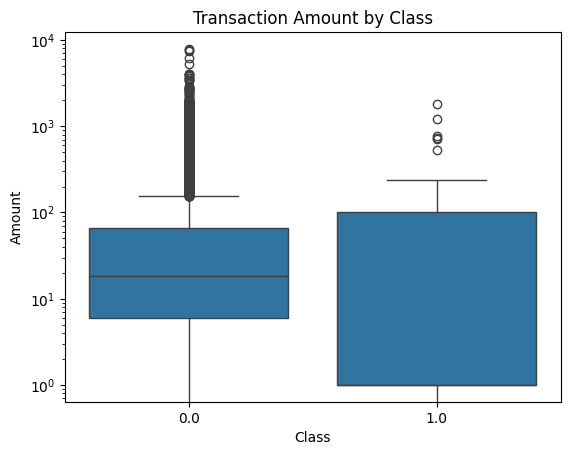

In [ ]:
sns.boxplot(x='Class', y='Amount', data=data)
plt.yscale('log')
plt.title('Transaction Amount by Class')
plt.show()

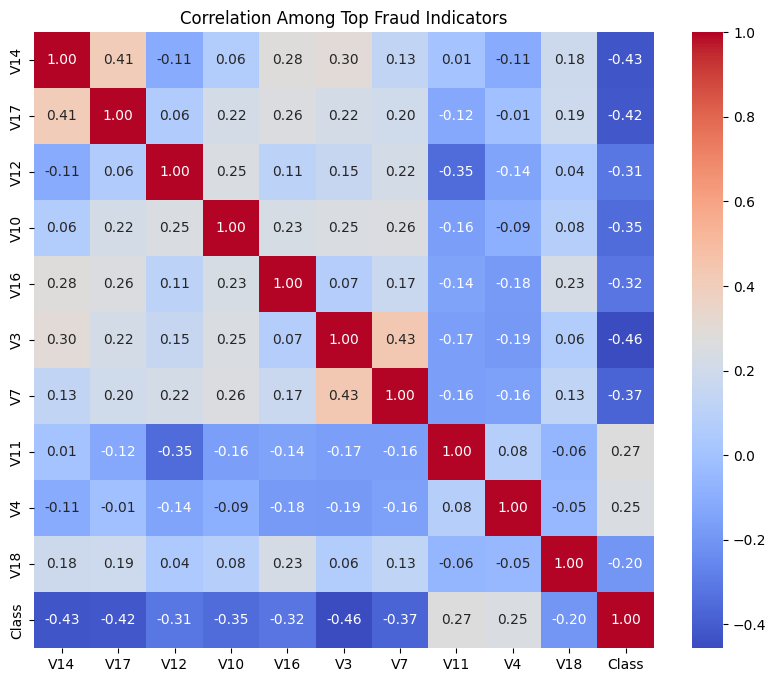

In [ ]:
top_features = ['V14', 'V17', 'V12', 'V10', 'V16', 'V3', 'V7', 'V11', 'V4', 'V18']
plt.figure(figsize=(10, 8))
sns.heatmap(data[top_features + ['Class']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Among Top Fraud Indicators')
plt.show()

In [ ]:
data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
data.groupby('Class')['Amount'].describe()

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0.0,23769.0,73.880199,212.541174,0.0,6.0,18.11,65.85,7879.42
1.0,88.0,100.010000,265.845031,0.0,1.0,1.00,99.99,1809.68


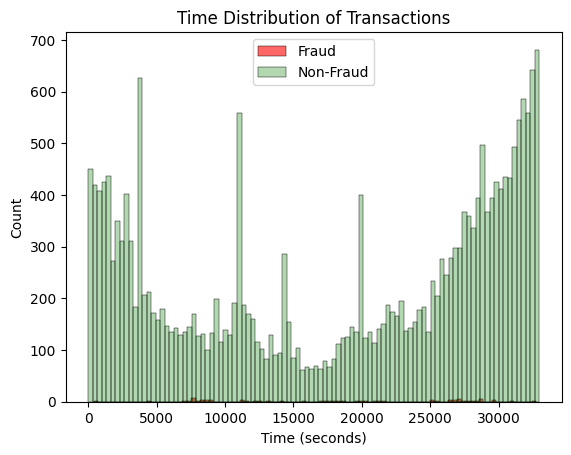

In [ ]:
sns.histplot(data[data['Class'] == 1]['Time'], bins=100, color='red', label='Fraud', alpha=0.6)
sns.histplot(data[data['Class'] == 0]['Time'], bins=100, color='green', label='Non-Fraud', alpha=0.3)
plt.title('Time Distribution of Transactions')
plt.xlabel('Time (seconds)')
plt.legend()
plt.show()


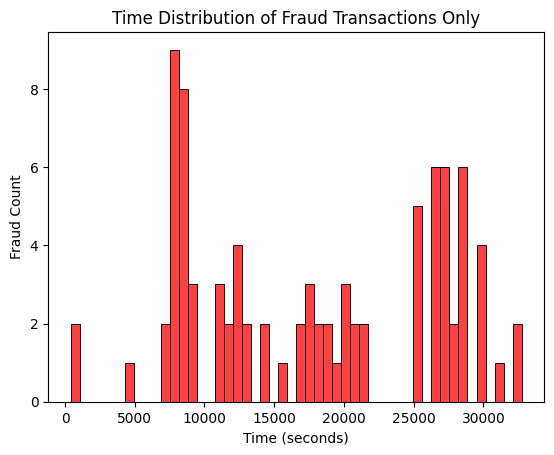

In [ ]:
sns.histplot(data[data['Class'] == 1]['Time'], bins=50, color='red')
plt.title("Time Distribution of Fraud Transactions Only")
plt.xlabel("Time (seconds)")
plt.ylabel("Fraud Count")
plt.show()

In [ ]:
data.var().sort_values(ascending=False).head(10)

,0
Time,1.294369e+08
Amount,4.526736e+04
V1,3.588064e+00
V3,2.975236e+00
log_amount,2.474245e+00
V12,2.376927e+00
V2,2.350312e+00
V4,2.076301e+00
V5,2.073295e+00
V8,1.899936e+00


In [ ]:
!pip install pca

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 95.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 17.2 MB/s eta 0:00:00


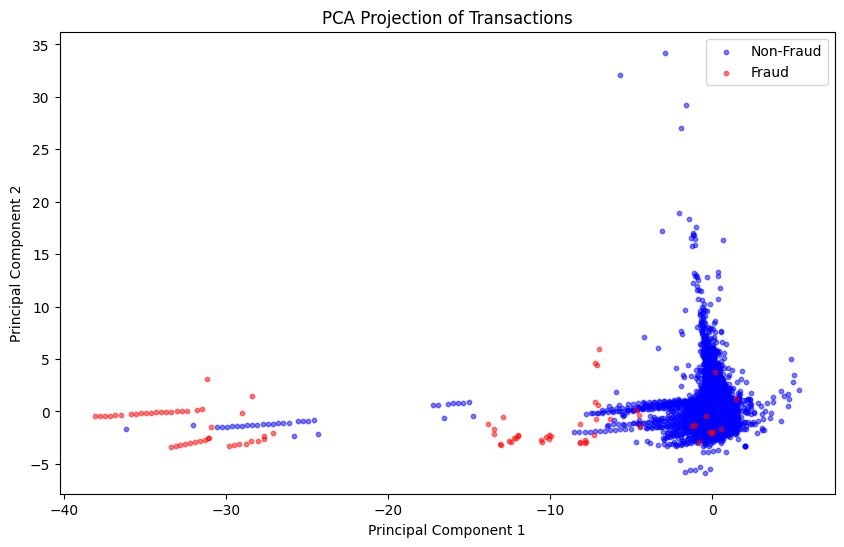

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = data.drop(['Class', 'Time'], axis=1)
y = data['Class']

# Impute missing values using the mean strategy
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

X_scaled = StandardScaler().fit_transform(X_imputed)
X_pca = PCA(n_components=2, random_state=42).fit_transform(X_scaled)

pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Class'] = y

plt.figure(figsize=(10, 6))
for label, color in zip([0, 1], ['blue', 'red']):
    subset = pca_df[pca_df['Class'] == label]
    plt.scatter(subset['PC1'], subset['PC2'],
                c=color, label=f"{'Non-Fraud' if label==0 else 'Fraud'}", alpha=0.5, s=10)

plt.title('PCA Projection of Transactions')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

#Logistic

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Drop rows with NaN in the 'Class' column before splitting
data = data.dropna(subset=['Class'])

X = data.drop(columns=["Class"])
y = data["Class"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

log_reg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(solver='liblinear', random_state=42))
])

log_reg_pipeline.fit(X_train, y_train)

y_pred = log_reg_pipeline.predict(X_test)
y_prob = log_reg_pipeline.predict_proba(X_test)[:, 1]

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

Confusion Matrix:
[[7126    6]
 [   7   19]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7132
         1.0       0.76      0.73      0.75        26

    accuracy                           1.00      7158
   macro avg       0.88      0.86      0.87      7158
weighted avg       1.00      1.00      1.00      7158

ROC-AUC Score: 0.9926711678674662


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


X = data.drop(columns=["Class"])
y = data["Class"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

log_reg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(solver='liblinear',class_weight='balanced', random_state=42))
])

log_reg_pipeline.fit(X_train, y_train)

y_pred = log_reg_pipeline.predict(X_test)
y_prob = log_reg_pipeline.predict_proba(X_test)[:, 1]

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

Confusion Matrix:
[[7055   77]
 [   2   24]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      7132
         1.0       0.24      0.92      0.38        26

    accuracy                           0.99      7158
   macro avg       0.62      0.96      0.69      7158
weighted avg       1.00      0.99      0.99      7158

ROC-AUC Score: 0.9801652357737607


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

X = data.drop(columns=["Class", "Time"])
y = data["Class"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Pipeline with scaler and logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(solver='liblinear', random_state=42))
])

# Hyperparameter grid
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__class_weight': [None, 'balanced']
}

# Grid search
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

# Evaluation
print("Best Parameters:", grid_search.best_params_)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'classifier__C': 10, 'classifier__class_weight': None, 'classifier__penalty': 'l2'}

Confusion Matrix:
 [[7128    4]
 [   7   19]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7132
         1.0       0.83      0.73      0.78        26

    accuracy                           1.00      7158
   macro avg       0.91      0.87      0.89      7158
weighted avg       1.00      1.00      1.00      7158

ROC-AUC Score: 0.9823547176323397


#SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC(kernel='rbf', probability=True, random_state=42))
])

svm_pipeline.fit(X_train, y_train)

y_pred = svm_pipeline.predict(X_test)
y_prob = svm_pipeline.predict_proba(X_test)[:, 1]

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))


Confusion Matrix:
[[7131    1]
 [   7   19]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7132
         1.0       0.95      0.73      0.83        26

    accuracy                           1.00      7158
   macro avg       0.97      0.87      0.91      7158
weighted avg       1.00      1.00      1.00      7158

ROC-AUC Score: 0.9894840157038698


In [ ]:


X = data.drop(columns=["Class"])
y = data["Class"]

# 1. First, create a small sample for GridSearch
X_sample, _, y_sample, _ = train_test_split(X, y, train_size=0.8, stratify=y, random_state=42) # Changed train_size to 0.8 to represent 80% of the data for training

# 2. Split that sample
X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(X_sample, y_sample, test_size=0.3, stratify=y_sample, random_state=42)

# 3. Create pipeline
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC(probability=True, random_state=42))
])

# 4. Define param grid
param_grid = {
    'classifier__C': [0.1, 1, 10],
    'classifier__gamma': [1, 0.1, 0.01],
    'classifier__kernel': ['rbf'],
}

# 5. GridSearchCV
grid_search = GridSearchCV(
    svm_pipeline,
    param_grid,
    cv=3,
    scoring='roc_auc',
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train_sample, y_train_sample)

print("Best Parameters:", grid_search.best_params_)

# 6. Now, retrain on FULL dataset using best params
# Split full data
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Build final model
final_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC(
        C=grid_search.best_params_['classifier__C'],
        gamma=grid_search.best_params_['classifier__gamma'],
        kernel='rbf',
        probability=True,
        random_state=42
    ))
])

final_pipeline.fit(X_train_full, y_train_full)

# Predictions
y_pred_final = final_pipeline.predict(X_test_full)
y_prob_final = final_pipeline.predict_proba(X_test_full)[:, 1]

# Results
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_full, y_pred_final))

print("\nClassification Report:")
print(classification_report(y_test_full, y_pred_final))

print("\nROC-AUC Score:", roc_auc_score(y_test_full, y_prob_final))


Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best Parameters: {'classifier__C': 0.1, 'classifier__gamma': 0.1, 'classifier__kernel': 'rbf'}

Confusion Matrix:
[[7132    0]
 [  26    0]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7132
         1.0       0.00      0.00      0.00        26

    accuracy                           1.00      7158
   macro avg       0.50      0.50      0.50      7158
weighted avg       0.99      1.00      0.99      7158


ROC-AUC Score: 0.970431209284266


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#Decison Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

tree_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

tree_pipeline.fit(X_train, y_train)

y_pred = tree_pipeline.predict(X_test)
y_prob = tree_pipeline.predict_proba(X_test)[:, 1]

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))


Confusion Matrix:
[[7128    4]
 [   6   20]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7132
         1.0       0.83      0.77      0.80        26

    accuracy                           1.00      7158
   macro avg       0.92      0.88      0.90      7158
weighted avg       1.00      1.00      1.00      7158

ROC-AUC Score: 0.8843349583674878


#RF

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


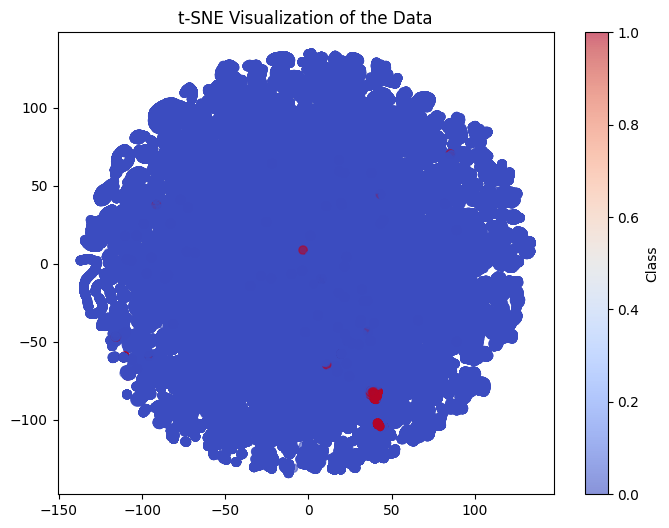

Confusion Matrix:
[[56859     5]
 [   17    81]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.83      0.88        98

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962


ROC-AUC Score: 0.9528106983508091


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

data = pd.read_csv('creditcard.csv')

X = data.drop(['Class', 'Time'], axis=1)
y = data['Class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

tsne = TSNE(n_components=2, random_state=42, n_iter=1000, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca)

plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='coolwarm', alpha=0.6)
plt.title('t-SNE Visualization of the Data')
plt.colorbar(label='Class')
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]

conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)
print("\nROC-AUC Score:", roc_auc)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

X = data.drop(columns=["Class"])
y = data["Class"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5],
    'classifier__class_weight': [None, 'balanced']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

y_pred = grid_search.predict(X_test)
y_prob = grid_search.predict_proba(X_test)[:, 1]

print("Best Parameters:", grid_search.best_params_)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'classifier__class_weight': None, 'classifier__max_depth': 10, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}

Confusion Matrix:
[[85290     5]
 [   36   112]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.96      0.76      0.85       148

    accuracy                           1.00     85443
   macro avg       0.98      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443

ROC-AUC Score: 0.9745847083967725


#XGBoost

In [ ]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.1/318.1 MB 3.3 MB/s eta 0:00:00


In [ ]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

xgb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

xgb_pipeline.fit(X_train, y_train)

y_pred = xgb_pipeline.predict(X_test)
y_prob = xgb_pipeline.predict_proba(X_test)[:, 1]

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [23:36:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Confusion Matrix:
[[85288     7]
 [   36   112]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.94      0.76      0.84       148

    accuracy                           1.00     85443
   macro avg       0.97      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443

ROC-AUC Score: 0.92859883742116
